# Linear Regression

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from linear_regression import LinearRegression

### Import the data

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Hours of study,Test scores
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


### Extract the features and labels

In [3]:
X = df.drop("Test scores",axis=1)
y = df["Test scores"]

### Plot the dataset

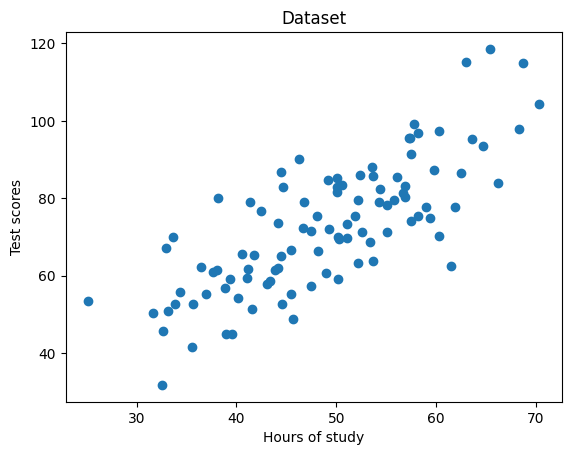

In [4]:
plt.scatter(X,y)
plt.xlabel("Hours of study")
plt.ylabel("Test scores")
plt.title('Dataset')
plt.show()

### Split the data into train and test sets

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

### Standardize the data

In [6]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Linear Regression Model

In [7]:
linear_regression = LinearRegression(learning_rate=0.01,epochs=1000)
cost_graph = linear_regression.fit(x_train, y_train)

epoch: 0, cost: 2676.6792873604
epoch: 100, cost: 407.0728162927615
epoch: 200, cost: 102.99167924359297
epoch: 300, cost: 62.250987371306046
epoch: 400, cost: 56.792562720768615
epoch: 500, cost: 56.0612447608529
epoch: 600, cost: 55.963263018365616
epoch: 700, cost: 55.95013545636515
epoch: 800, cost: 55.94837662987665
epoch: 900, cost: 55.9481409828756
epoch: 1000, cost: 55.94810941096701


### Plotting the cost per iterations

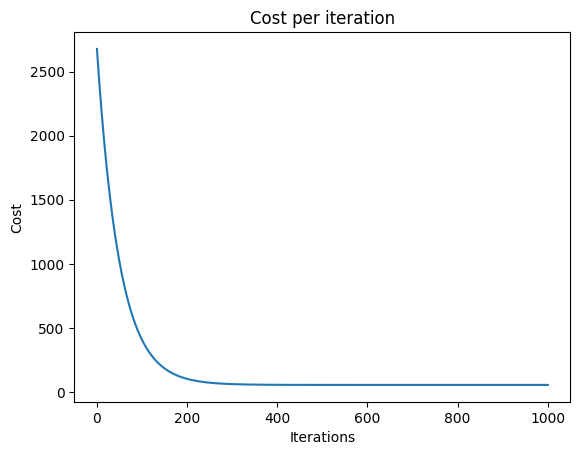

In [8]:
plt.plot(range(len(cost_graph)), cost_graph)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

### Testing the model

In [9]:
y_pred = linear_regression.predict(x_test)


r2 = linear_regression.r2_score(y_test,y_pred)
print("R2 score:",r2)


R2 score: 0.6990041698657107


### Plot line chart showing the actual and predicted values

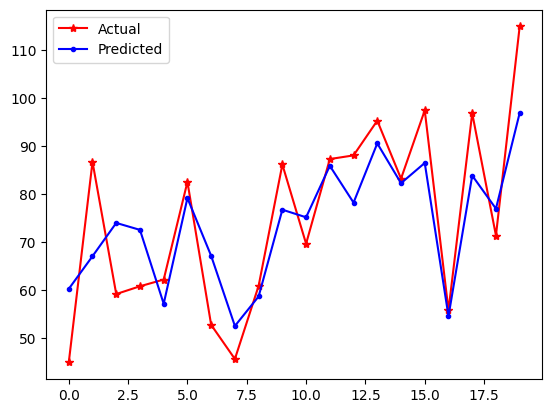

In [10]:
plt.plot(range(y_test.size), y_test, linestyle='-', marker='*', color='r')
plt.plot(range(y_test.size), y_pred, linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'])
plt.show()

### Plotting the best fit line

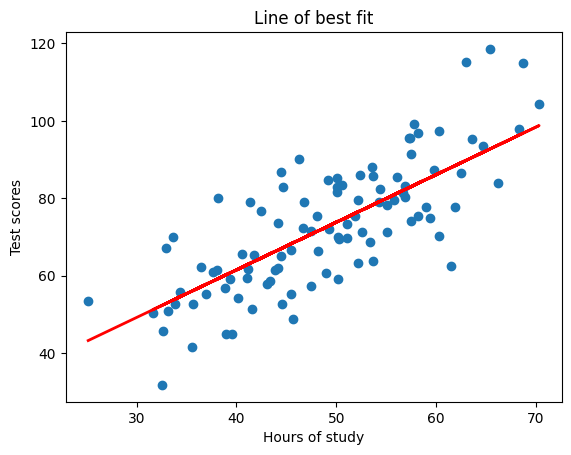

In [11]:
y_pred_line = linear_regression.predict(scaler.transform(X))

plt.scatter(X,y)
plt.plot(X,y_pred_line,color='red',linewidth=2)
plt.xlabel("Hours of study")
plt.ylabel("Test scores")
plt.title('Line of best fit')
plt.show()